# Análise de Produção de Procedimentos de Saúde — Santa Rosa

---




## Índice

1. [Introdução](#introducao)  
2. [Etapas de Análise](#etapas)  
   - [1. Análise Exploratória de Dados (EDA)](#eda)  
   - [2. Limpeza e Preparação dos Dados](#limpeza)  
   - [3. Análises Estratégicas para o Gestor de Saúde do Município](#analises)  
     - [3.1 Volume e Perfil dos Procedimentos](#volume)  
     - [3.2 Produção por Estabelecimento de Saúde](#estabelecimento)  
     - [3.3 Perfil Demográfico e Epidemiológico](#perfil)  
     - [3.4 Fluxos Regionais e Acesso](#fluxos)  
     - [3.5 Recursos Financeiros](#recursos)  
     - [3.6 Foco em Áreas Críticas](#foco)  
     - [3.7 Comparações e Tendências](#comparacoes)  
4. [Anexos e Referências](#anexos)

---



<a id="introducao"></a>
## 1. Introdução

Este notebook organiza, sem código, os resultados e a apresentação das análises solicitadas sobre os procedimentos ambulatoriais e hospitalares realizados em **Santa Rosa**.  
Use cada seção para colar tabelas, gráficos e observações. Indicamos também queries SQL e/ou procedimentos ETL sugeridos quando pertinente.



<a id="etapas"></a>
## 2. Etapas de Análise (resumo)

Abaixo estão as etapas principais. Em cada sub-seção há espaço para: *objetivo*, *método/consulta usada*, *tabelas/resultados* e *insights*.



<a id="eda"></a>
### 2.1 Análise Exploratória de Dados (EDA)

**Objetivos**
- Conhecer dimensão do dataset e tipos de variáveis.
- Obter estatísticas descritivas iniciais.
- Identificar valores faltantes e inválidos.


**Detecção de problemas**
- Valores ausentes (NaN / vazio) — listar colunas e contagens.
- Valores inválidos (ex.: idade fora da faixa, sexo ≠ M/F, CIDs inconsistentes) — listar exemplos e contagens.



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mysql.connector

# Conexão com o banco de dados
connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

QUERY = """
DESCRIBE pars;

"""
cursor = connection.cursor(dictionary=True)
cursor.execute(QUERY)
data = cursor.fetchall()
df = pd.DataFrame(data)
print("Estrutura da tabela 'pars':")
display(df)



Estrutura da tabela 'pars':


,Field,Type,Null,Key,Default,Extra
0,PA_CODUNI,varchar(20),YES,,None,
1,PA_GESTAO,varchar(20),YES,,None,
2,PA_CONDIC,varchar(20),YES,,None,
3,PA_UFMUN,varchar(10),YES,,None,
4,PA_REGCT,varchar(20),YES,,None,
5,PA_INCOUT,varchar(20),YES,,None,
6,PA_INCURG,varchar(20),YES,,None,
7,PA_TPUPS,varchar(20),YES,,None,
8,PA_TIPPRE,varchar(20),YES,,None,
9,PA_MN_IND,varchar(20),YES,,None,


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mysql.connector

# Conexão com o banco de dados
connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

QUERY = """
DESCRIBE s_cid;

"""
cursor = connection.cursor(dictionary=True)
cursor.execute(QUERY)
data = cursor.fetchall()
df = pd.DataFrame(data)
print("Estrutura da tabela 's_cid':")
display(df)



Estrutura da tabela 's_cid':


,Field,Type,Null,Key,Default,Extra
0,cd_cod,char(4),YES,,None,
1,opc,char(1),YES,,None,
2,cat,char(1),YES,,None,
3,subcat,char(1),YES,,None,
4,cd_descr,char(50),YES,,None,
5,restrsexo,char(1),YES,,None,
6,campos_rad,char(3),YES,,None,
7,estadio,char(1),YES,,None,
8,repete_rad,char(1),YES,,None,


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mysql.connector

# Conexão com o banco de dados
connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

QUERY = """
DESCRIBE tb_sigtaw;

"""
cursor = connection.cursor(dictionary=True)
cursor.execute(QUERY)
data = cursor.fetchall()
df = pd.DataFrame(data)
print("Estrutura da tabela 'tb_sigtaw':")
display(df)

connection.close()

Estrutura da tabela 'tb_sigtaw':


,Field,Type,Null,Key,Default,Extra
0,ip_cod,char(10),YES,,None,
1,ip_dscr,char(150),YES,,None,


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mysql.connector

# Conexão com o banco de dados
connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

QUERY = """
DESCRIBE tb_municip;

"""
cursor = connection.cursor(dictionary=True)
cursor.execute(QUERY)
data = cursor.fetchall()
df = pd.DataFrame(data)
print("Estrutura da tabela 'tb_municip':")
display(df)


Estrutura da tabela 'tb_municip':


,Field,Type,Null,Key,Default,Extra
0,co_municip,char(6),YES,,None,
1,co_municdv,char(7),YES,,None,
2,co_status,char(7),YES,,None,
3,co_tipo,char(7),YES,,None,
4,ds_nome,char(48),YES,,None,
5,ds_nomepad,char(48),YES,,None,
6,ds_observ,char(1),YES,,None,
7,co_regiao,char(1),YES,,None,
8,co_uf,char(2),YES,,None,
9,co_alter,char(1),YES,,None,



<a id="limpeza"></a>
### 2.2 Limpeza e Preparação dos Dados

**Objetivos**
- Corrigir problemas identificados na EDA.
- Produzir um dataset pronto para análise estratégica.

**Estratégias propostas**
- Valores nulos: apresentar contagem e a ação aplicada (apagar linhas ou preencher com "Não informado").
- Inconsistências: descrição das regras de normalização (ex.: padronizar nomes de municípios, especialidades).
- Duplicações: número de registros duplicados encontrados e ação (remoção).

**Tabela de antes/depois**
- Colocar uma tabela resumo com contagens “antes” e “depois” por tipo de limpeza.

**Observações**
- Registrar decisões de imputação/exclusão para auditoria.



<a id="analises"></a>
## 3. Análises Estratégicas para o Gestor de Saúde do Município

Nesta seção, cole resultados, tabelas e gráficos finais que respondam às perguntas estratégicas.



<a id="volume"></a>
### 3.1 Volume e Perfil dos Procedimentos

**Perguntas-chave**
- Quantos procedimentos ambulatoriais foram realizados em Santa Rosa no último mês, trimestre e ano?

**Observação técnica**
- Gerar a granularidade temporal a partir do arquivo `04-gera-dimtempo-mysql.sql` (usar dim_tempo para agrupar por mês/trimestre/ano).

**Tabelas / Gráficos a incluir**
- Tabela: contagem de procedimentos por período (mês / trimestre / ano).
- Gráfico: série temporal com tendência (últimos 24 meses).
- Tabela: distribuição por especialidade/procedimento (consultas, exames de imagem, oncologia, psiquiatria, etc).
- Análise de picos e quedas na demanda (datas e possíveis causas).

**Espaço para resultados**
- Número procedimentos (mês): `______`  
- Número procedimentos (trimestre): `______`  
- Número procedimentos (ano): `______`

**Insights**
- (encher com comentários)



<a id="estabelecimento"></a>
### 3.2 Produção por Estabelecimento de Saúde

**Perguntas-chave**
- Ranking de produção por estabelecimento (Hospital Vida & Saúde, UBS, clínicas conveniadas).
- Comparar volume de procedimentos aprovados × produzidos.
- Avaliar taxa de procedimentos produzidos (produzidos / aprovados).

**Tabelas / Gráficos a incluir**
- Tabela: ranking por número de procedimentos e valor financeiro.
- Gráfico: barras com aprovados vs produzidos por estabelecimento.
- KPI: taxa de produção (%) por estabelecimento.

**Espaço para resultados**
- Tabela de ranking (colar aqui)
- Observações sobre discrepâncias aprovados × produzidos.



<a id="perfil"></a>
### 3.3 Perfil Demográfico e Epidemiológico da População Atendida

**Perguntas-chave**
- Distribuição por sexo e faixa etária.
- Principais diagnósticos (CIDs) atendidos.
- Procedimentos recorrentes para doenças crônicas.

**Tabelas / Gráficos a incluir**
- Pirâmide etária / histograma por faixa etária.
- Tabela: top 10 CIDs por número de atendimentos.
- Tabela/Gráfico: procedimentos recorrentes por CID (ex.: hipertensão, diabetes).


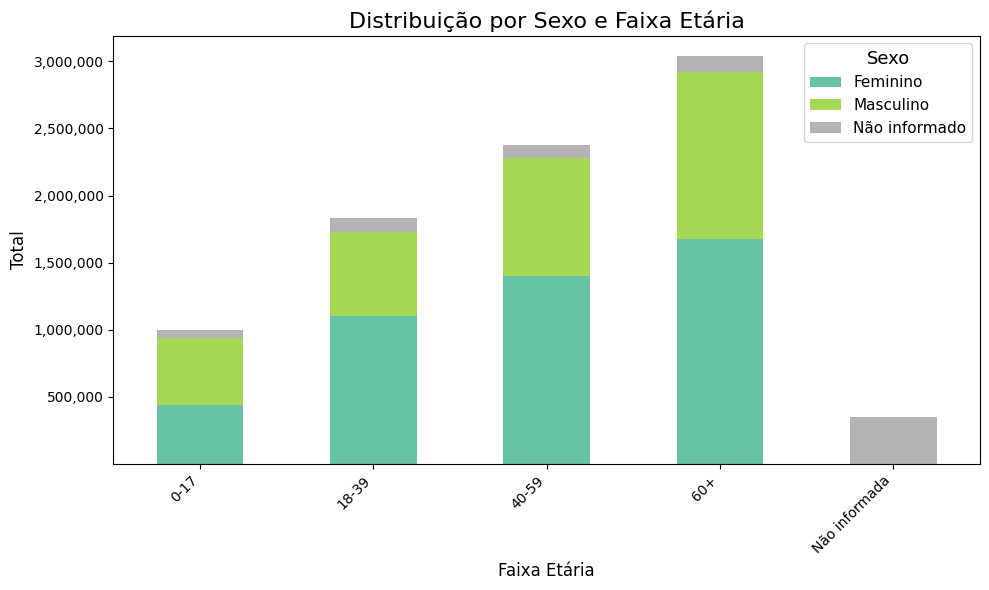

In [2]:
# Distribuição por sexo e faixa etária
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
    

connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

QUERY = """
SELECT
    CASE PA_SEXO
        WHEN '0' THEN 'Não informado'
        WHEN 'M' THEN 'Masculino'
        WHEN 'F' THEN 'Feminino'
        ELSE 'Outro/Inválido'
    END AS sexo,
    CASE
        WHEN PA_IDADE >= 150 THEN 'Não informada'
        WHEN PA_IDADE BETWEEN 0 AND 17 THEN '0-17'
        WHEN PA_IDADE BETWEEN 18 AND 39 THEN '18-39'
        WHEN PA_IDADE BETWEEN 40 AND 59 THEN '40-59'
        WHEN PA_IDADE between 60 and 150 THEN '60+'
        ELSE 'Não informada'
    END AS faixa_etaria,
    SUM(contagem) AS total
FROM (
    SELECT
        PA_SEXO,
        PA_IDADE,
        COUNT(*) AS contagem
    FROM pars
    GROUP BY PA_SEXO, PA_IDADE
    UNION ALL
    SELECT
        PA_SEXO,
        PA_IDADE,
        COUNT(*) AS contagem
    FROM pars2412
    GROUP BY PA_SEXO, PA_IDADE
    UNION ALL
    SELECT
        PA_SEXO,
        PA_IDADE,
        COUNT(*) AS contagem
    FROM pars2501
    GROUP BY PA_SEXO, PA_IDADE
) AS x
GROUP BY 1, 2
ORDER BY 1, 2;

"""
cursor = connection.cursor(dictionary=True)
cursor.execute(QUERY)
data = cursor.fetchall()
df = pd.DataFrame(data)
# Convertendo a coluna 'total' para numérico (em caso de algum valor não ser numérico)
df['total'] = pd.to_numeric(df['total'], errors='coerce')

# Pivotando os dados para criar uma visualização por sexo e faixa etária
pivot_df = df.pivot(index='faixa_etaria', columns='sexo', values='total')

# Plotando o gráfico
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Personalizando o gráfico
plt.title('Distribuição por Sexo e Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexo', title_fontsize='13', fontsize='11')

# Formatando os valores no eixo Y para não aparecerem em notação científica
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

# Exibindo o gráfico
plt.tight_layout()
plt.show()



<a id="fluxos"></a>
### 3.4 Fluxos Regionais e Acesso

**Perguntas-chave**
- Municípios de origem dos pacientes atendidos em Santa Rosa.
- Quantos atendimentos feitos em Ijuí são de moradores de outros municípios.
- Identificação de regiões dependentes do Hospital Vida & Saúde ou UBSs locais.

**Tabelas / Gráficos a incluir**
- Mapa / tabela: municípios de procedência (top 20).
- Tabela: atendimentos em Ijuí por município de residência.
- Análise de dependência regional (percentual de usuários vindos de fora).

**Espaço para resultados**
- Top 10 municípios de origem: (colar tabela)
- Percentual de pacientes de fora em Ijuí: `______%`



<a id="recursos"></a>
### 3.5 Recursos Financeiros

**Perguntas-chave**
- Total de valores aprovados pelo SUS para Santa Rosa × valores produzidos.
- Diferença entre produzidos e aprovados.
- Evolução do gasto médio por procedimento.

**Tabelas / Gráficos a incluir**
- Tabela resumo: aprovados vs produzidos por período.
- Gráfico: evolução do gasto médio por procedimento (mês/trimestre).
- KPI: diferença absoluta e percentual entre aprovados e produzidos.

**Espaço para resultados**
- Total aprovados (ano): `R$ ______`  
- Total produzidos (ano): `R$ ______`  
- Diferença: `R$ ______` (`__%`)



<a id="foco"></a>
### 3.6 Foco em Áreas Críticas

**Temas**
- Oncologia: quimioterapia e radioterapia (aprovados × produzidos).
- Saúde mental: atendimentos psiquiátricos e psicológicos.
- Atenção básica: consultas e procedimentos nas UBS, acompanhamento de doenças crônicas.

**Tabelas / Gráficos a incluir**
- Tabela: aprovados vs produzidos em oncologia (quimioterapia, radioterapia).
- Série temporal: atendimentos em saúde mental.
- Indicadores de atenção básica: consultas por usuário no último ano, acompanhamento de diabéticos/hipertensos.

**Espaço para resultados**
- Aprovados × produzidos (oncologia): (colar tabela)
- Observações e recomendações operacionais.



<a id="comparacoes"></a>
### 3.7 Comparações e Tendências

**Perguntas-chave**
- Comparar Santa Rosa com municípios da região (Ijuí, Santo Ângelo).
- A demanda de Santa Rosa cresce acima da média regional?
- Identificar tendências (ex.: envelhecimento → mais procedimentos cardiológicos e oncológicos).


In [ ]:
# Validar Santa Rosa e municipios da região (quantidade de consultas por cidade)
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
    

connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

QUERY = """
SELECT 
    m.ds_nome AS municipio,
    SUM(t.PA_QTDAPR) AS total_consultas
FROM (
        SELECT PA_MUNPCN, PA_DOCORIG, PA_QTDAPR
        FROM pars
        
        UNION ALL
        SELECT PA_MUNPCN, PA_DOCORIG, PA_QTDAPR
        FROM pars2412
        
        UNION ALL
        SELECT PA_MUNPCN, PA_DOCORIG, PA_QTDAPR
        FROM pars2501
     ) AS t
LEFT JOIN tb_municip m 
    ON m.co_municip = t.PA_MUNPCN
WHERE 1=1
  AND t.PA_DOCORIG IN ('B','I')  
  AND t.PA_MUNPCN IN (
      '431720',  -- Santa Rosa
      '430850',  -- Giruá
      '430960',  -- Horizontina
      '430020',  -- Alecrim
      '431790',  -- Santo Cristo
      '431020'   -- Ijuí
  )
GROUP BY 
    m.ds_nome
ORDER BY 
    total_consultas DESC;
"""

cursor = connection.cursor(dictionary=True)
cursor.execute(QUERY)
data = cursor.fetchall()
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

# barras horizontais
plt.barh(df["municipio"], df["total_consultas"])

# média regional
media_regional = float(df["total_consultas"].mean())

# linha vertical da média
plt.axvline(media_regional, color='red', linestyle='--', linewidth=1.5)

# texto da média
plt.text(
    media_regional,
    -0.5,
    f"Média regional: {int(media_regional):,}".replace(",", "."),
    color='red',
    fontsize=11,
    fontweight='bold',
    ha='center'
)

# título estilizado
plt.title("Consultas Ambulatoriais por Município", fontsize=16, fontweight="bold")

# labels dos eixos
plt.xlabel("Total de Consultas", fontsize=12)
plt.ylabel("Município", fontsize=12)

# adicionar valores ao lado das barras
for index, value in enumerate(df["total_consultas"]):
    v = float(value)
    plt.text(v + (v * 0.01), index, f"{int(v):,}".replace(",", "."), va="center")

# grid discreto
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()




In [36]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

# Conexão
connection = mysql.connector.connect(
    host="192.168.196.63",
    user="root",
    password="ABC!abc123",
    database="projeto1"
)

cursor = connection.cursor(dictionary=True)

# Consulta simples pegando apenas total por mês
cursor.execute("""
    SELECT 
        dt.anomes,
        SUM(p.PA_QTDAPR) AS total_procedimentos
    FROM (
        SELECT PA_CIDPRI, PA_CMP, PA_QTDAPR FROM pars
        UNION ALL
        SELECT PA_CIDPRI, PA_CMP, PA_QTDAPR FROM pars2412
        UNION ALL
        SELECT PA_CIDPRI, PA_CMP, PA_QTDAPR FROM pars2501
    ) p
    JOIN dimtempo dt ON dt.anomes = p.PA_CMP
    WHERE dt.anomes IN ('202412','202501','202508')
    GROUP BY dt.anomes
    ORDER BY dt.anomes;
""")

dados = cursor.fetchall()
df = pd.DataFrame(dados)

# Gráfico
plt.plot(df["anomes"], df["total_procedimentos"], marker="o")
plt.title("Tendência Simples – Total de Procedimentos")
plt.xlabel("Competência (AAAAMM)")
plt.ylabel("Total de Procedimentos")
plt.grid(True)
plt.show()


KeyboardInterrupt: 


<a id="anexos"></a>
## 4. Anexos e Referências

- Arquivos SQL referenciados:
  - `04-gera-dimtempo-mysql.sql` — usar para gerar dimensão de tempo e granularidades.
- Logs e decisões de limpeza (incluir arquivo CSV ou planilha com auditoria).
- Scripts/consultas utilizados (colar ou anexar em arquivos separados).
- Glossário de termos e siglas (SUS, UBS, CID, etc).
